<a href="https://colab.research.google.com/github/Sangyeonglee353/ai-musthave/blob/main/Chapter_03_%EA%B0%84%EB%8B%A8%ED%95%9C_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn
!pip install pandas
!pip install tqdm

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# 3.1 사인 함수 예측하기

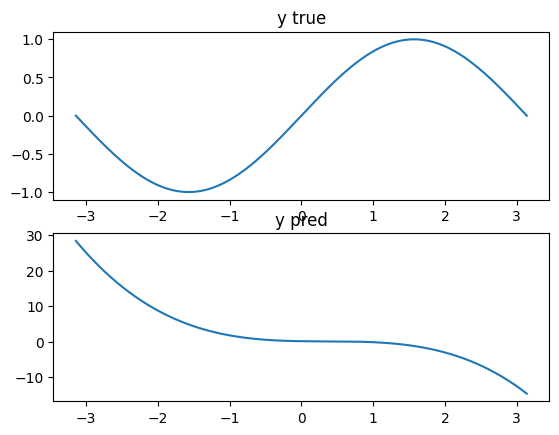

In [8]:
# 필요한 라이브러리 불러오기
import math # 수학 패키지 임포트
import torch # 파이토치 모듈 임포트
import matplotlib.pyplot as plt # 시각화 라이브러리 matplotlib 임포트

# 1. -pi ~ pi 사이에서 점을 1,000개 추출
x = torch.linspace(-math.pi, math.pi, 1000)

# 2. 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

# 3. 예측 사인곡선에 사용할 임의의 가중치(계수)를 뽑아 y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인 함수를 근사할 3차 다항식 정의
y_random = a * x**3 + b * x**2 + c * x + d

# 4. 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(2, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 5. 예측 사인곡선을 임의의 가중치로 만든 y값으로 만들기
plt.subplot(2, 1, 2)
plt.title("y pred")
plt.plot(x, y_random)

# 6. 실제와 예측 사인곡선 출력하기
plt.show()

## 3.1.2 가중치를 학습시켜서 사인곡선 그리기

epoch(epoch+1) loss:75035.390625
epoch(epoch+1) loss:866.4606323242188
epoch(epoch+1) loss:778.2301025390625
epoch(epoch+1) loss:722.7655639648438
epoch(epoch+1) loss:687.4833984375
epoch(epoch+1) loss:664.7507934570312
epoch(epoch+1) loss:649.9053955078125
epoch(epoch+1) loss:640.0777587890625
epoch(epoch+1) loss:633.4865112304688
epoch(epoch+1) loss:629.0152587890625
epoch(epoch+1) loss:625.955810546875
epoch(epoch+1) loss:623.8536987304688
epoch(epoch+1) loss:622.4122314453125
epoch(epoch+1) loss:621.4354248046875
epoch(epoch+1) loss:620.7909545898438
epoch(epoch+1) loss:620.3883056640625
epoch(epoch+1) loss:620.1640625
epoch(epoch+1) loss:620.0734252929688
epoch(epoch+1) loss:620.0839233398438
epoch(epoch+1) loss:620.1719360351562


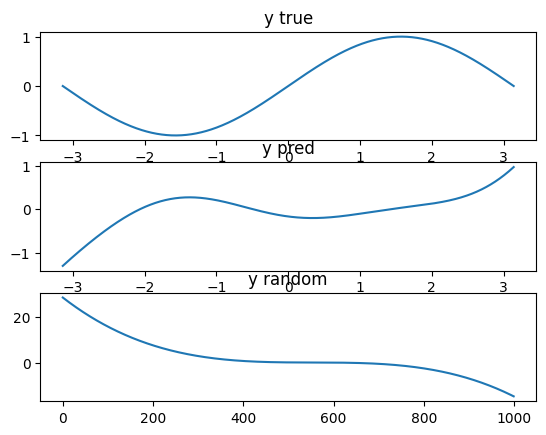

In [9]:
# 학습률 정의
learning_rate = 1e-6

# 학습 2,000번 진행
for epoch in range(2000):
  y_pred = a * x**3 + b * y**2 + c * x + d

  loss = (y_pred - y).pow(2).sum().item() # 1. 손실 정의 / item: 실수값 반환
  if epoch % 100 == 0:
    print(f"epoch(epoch+1) loss:{loss}")

  grad_y_pred = 2.0 * (y_pred - y) # 2. 기울기의 미분값
  grad_a = (grad_y_pred * x ** 3).sum()
  grad_b = (grad_y_pred * y ** 2).sum()
  grad_c = (grad_y_pred * c).sum()
  grad_d = grad_y_pred.sum()

  a -= learning_rate * grad_a # 3. 가중치 업데이트
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

# 실제 사인 곡선을 그리기
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측한 가중치의 사인 곡선을 그리기
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선 그리기
plt.subplot(3, 1, 3)
plt.plot(y_random)
plt.title("y random")

# 실제로 그래프 출력하기
plt.show()

# 3.2 보스턴 집값 예측하기: 회귀 분석

## 3.2.1 데이터 살펴보기

In [3]:
# 보스턴 데이터셋의 특징 출력
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
dataset = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # 1. 데이터셋을 불러옴
target = raw_df.values[1::2, 2]

print(dataset) # 데이터셋의 키(요소들의 이름)을 출력

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [4]:
from sklearn.datasets import load_boston

dataset = load_boston()
print(dataset.keys())

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [5]:
# 에러 해결 sklearn downgrade
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.23.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
from sklearn.datasets import load_boston

dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

## 3.2.2 데이터 불러오기

In [4]:
import pandas as pd

from sklearn.datasets import load_boston

dataset = load_boston()
dataFrame = pd.DataFrame(dataset["data"]) # 1. 데이터셋의 데이터 불러오기
dataFrame.columns = dataset["feature_names"] # 2. 특징의 이름 불러오기
dataFrame["target"] = dataset["target"] # 3. 데이터프레임에 정답 추가

print(dataFrame.head()) # 4. 데이터프레임을 요약해서 출력

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


In [6]:
# 선형회귀 MLP 모델 설계
import torch
import torch.nn as nn

from torch.optim.adam import Adam

# 1. 모델 정의
model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

X = dataFrame.iloc[:, :13].values # 3. 정답을 제외한 특징을 X에 입력
Y = dataFrame["target"].values # 데이터프레임의 target값을 추출

batch_size = 100
learning_rate = 0.001

# 3. 가중치를 수정하는 최적화 함수 정의
optim = Adam(model.parameters(), lr=learning_rate)

# 에포크 반복
for epoch in range(200):
  # 배치 반복
  for i in range(len(X)//batch_size):
    start = i*batch_size # 4. 배치 크기에 맞게 인덱스 지정
    end = start + batch_size

    # 파이토치 실수형 텐서로 변환
    x = torch.FloatTensor(X[start:end])
    y = torch.FloatTensor(Y[start:end])

    optim.zero_grad() # 5. 가중치의 기울기를 0으로 초기화
    preds = model(x) # 6. 모델의 예측값 계산
    loss = nn.MSELoss()(preds, y) # 7. MSE 손실 계산
    loss.backward() # 8. 오차 역전파
    optim.step() # 9. 최적하ㅗ 진행

  if epoch % 20 == 0:
    print(f"epoch{epoch} loss:{loss.item()}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch0 loss:1513.085205078125
epoch20 loss:53.043270111083984
epoch40 loss:40.65554428100586
epoch60 loss:38.98038864135742
epoch80 loss:38.49893569946289
epoch100 loss:38.080535888671875
epoch120 loss:37.570186614990234
epoch140 loss:37.18534851074219
epoch160 loss:36.87334060668945
epoch180 loss:36.71391677856445


## 3.2.4 모델 성능 평가하기

In [7]:
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"prediction:{prediction.item()} real:{real}")

prediction:25.47264862060547 real:24.0
